<a href="https://colab.research.google.com/github/Hamid-Mofidi/The-Principles-of-Deep-Learning-Theory/blob/main/Ch.%200%3A%20Initialization/0.1%20and%200.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This book is appropriate for everyone with knowledge of linear algebra, multivariable calculus, and informal probability theory, and with a
healthy interest in neural networks.

Our main focus is on realistic models that are used by the deep learning
community in practice: we want to study deep neural networks. In particular, this means that (i) a number of special results on single-hidden-layer networks will not be discussed and (ii) the **infinite-width limit** of a neural network – which corresponds to a zero-hidden-layer network – will be introduced only as a starting point. All such idealized models will eventually be perturbed until they correspond to a real model.

The real power of the deep learning framework comes from deep neural networks,
with many neurons in parallel organized into sequential computational layers, learning useful representations of the world. Such representation learning transforms data into increasingly refined forms that are helpful for solving an underlying task, and is thought to be a hallmark of success in intelligence, both artificial and biological.

Despite these successes and the intense interest they created, deep learning theory is still in its infancy. Indeed, **there is a serious disconnect between theory and practice**:
while practitioners have reached amazing milestones, they have far outpaced the
theorists, whose analyses often involve assumptions so unrealistic that they lead to conclusions that are irrelevant to understanding deep neural networks as they are typically used.

The goal of this book is to put forth a set of principles that enable us to theoretically analyze deep neural networks of actual relevance. To initialize you to this task, in the rest of this chapter we’ll explain at a very high-level both (i) why such a goal is even attainable in theory and (ii) how we are able to get there in practice.

## 0.1 An Effective theory approach

During the training process, innumerable elementary computational components become very finely-tuned, and knowledge of the particular tunings is necessary for a system to produce useful output.

Unfortunately, the complexity of these tunings obscures any first-principles macroscopic understanding of why a deep neural network computes a particular function and not another.

Fortunately, theoretical physics has a long tradition of finding simple effective theories of complicated systems with a large number of components. The immense success of the program of physics in modeling our physical universe suggests that perhaps some of the same tools may be useful for theoretically understanding deep neural networks.

Despite a potential misconception, physics doesn’t make a distinction between natural and artificial phenomena. Most fundamentally, it’s concerned with providing a unified set of principles that account for past empirical observations and predict the result of future experiments; the point
of theoretical calculations is to connect measurable outcomes or observables directly to the fundamental underlying constants or parameters that define the theory. 

When successful, such theories provide a comprehensive understanding of phenomena and empower practical advances in technology.

For our study of deep learning, the key takeaway from this discussion is that a theoretical matter simplifies when it is made up of many elementary constituents.

Indeed, in this case we already understand the microscopic laws – how a network computes – and so instead our task is to understand the new types of regularity that appear at the macroscopic scale – why it computes one particular function rather than another – that emerge from the statistical properties of these gigantic deep learning models.

##  0.2 The Theoretical Minimum

In this section, we’ll give a high-level overview of our method, providing a minimal explanation for why we should expect a first-principles theoretical understanding of deep neural networks to be possible. 

We’ll then fill in all the details in the coming chapters.

In essence, a **neural network** is a recipe for computing a function built out of many computational units called **neurons**. Each neuron is itself a very simple function that considers a weighted sum of incoming signals and then fires in a characteristic way by comparing the value of that sum against some threshold. Neurons are then organized in parallel into **layers**, and **deep** neural networks are those composed of multiple layers in sequence. 

A graph depicting the structure of a much more reasonably-sized neural network is shown in Figure 1.

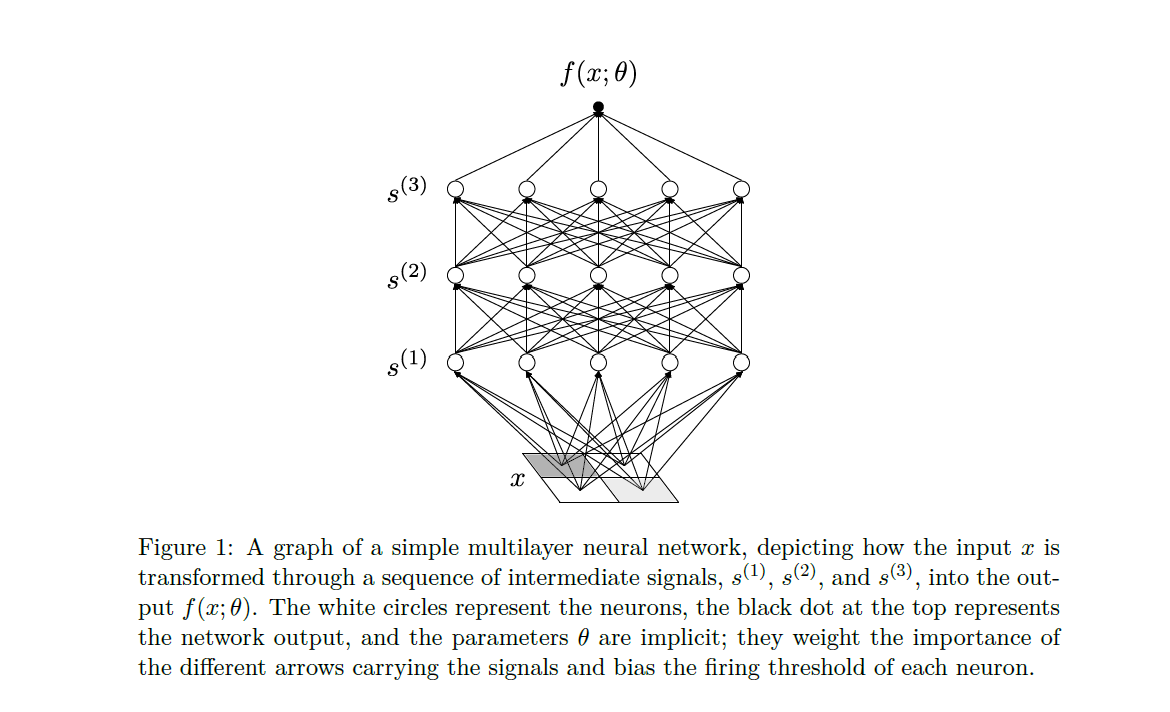

In [ ]:
from IPython.display import Image, HTML

Image('Fig1.png')
display(Image('Fig1.png', width=600, height=400))

For a moment, let’s ignore all that structure and simply think of a neural network as a parameterized function
\begin{equation}
f(x;\theta) 
\end{equation}
where x is the input to the function and $\theta$ is a vector of a large number of parameters controlling the shape of the function. For such a function to be useful, we need to somehow tune the high-dimensional parameter vector $\theta$. In practice, this is done in two steps:

**a. Initialization of the network**

**b. Adjustment to the parameter $\theta$ (training)**

We briefly go over each of the above cases:

## a. Initialization

Initializing a neural network refers to the process of setting the initial values of the weights and biases of the network. These initial values can have a significant impact on the performance of the network during training and can affect how quickly the network is able to converge to a good solution.

There are several options for initializing the weights and biases of a neural network, including:

**1- Random initialization:** This involves setting the weights and biases to random values, typically drawn from a normal distribution or a uniform distribution. This is a common approach to initialization and can work well for many types of networks.

**2- Xavier initialization:** This approach sets the initial weights to be drawn from a normal distribution **with mean 0 and variance 1/n**, where n is the number of inputs to the layer. This can help to ensure that the weights are initialized to appropriate values based on the number of inputs to the layer.

**3- He initialization:** This is similar to Xavier initialization, but sets the **variance of the normal distribution to 2/n instead of 1/n.** This can work well for networks with rectified linear units (ReLU) as activation functions.

**4- Orthogonal initialization:** This involves initializing the weights to be orthogonal to each other, which can help to prevent the gradients from exploding or vanishing during training.

## b. Adjustment to the parameters (training)

The adjustment to the parameters of a neural network is called the optimization process, or **training or learning**, and it involves updating the weights and biases of the network in order to minimize the loss function. 

During training, the network is presented with a set of input data and corresponding target outputs. The network then makes a prediction based on the current weights and biases, and the difference between the predicted output and the target output is calculated as **the loss**. The goal of the optimization process is to adjust the weights and biases in order to **minimize this loss**.

The optimization process typically involves the use of an optimization algorithm, such as stochastic gradient descent (SGD) or one of its variants, which calculates the gradient of the loss function with respect to the weights and biases. The weights and biases are then updated **in the direction of the negative gradient**, which helps to minimize the loss function.

The optimization process is typically performed over **multiple epochs**, with **each epoch consisting of one pass through the entire training dataset**. During each epoch, the weights and biases are updated multiple times using **mini-batches** of data, rather than the entire dataset at once. This helps to speed up the optimization process and avoid overfitting.

A goal is to adjust the parameter vector as $\theta^* \to \theta$, such that the resulting network function $f(x; \theta^*)$ (called **function approximation**) is as close as possible to a desired **target function** $f(x)$.  

Our goal is to understand this trained network function $f(x;\theta^*)$. In particular, we’d like to understand the macroscopic behavior of this function from a first-principles microscopic description of the network in terms of these trained parameters $\theta^*$.

One way to more directly see the kinds of technical problems that we’ll encounter is to **Taylor expand** our trained network function $f(x; \theta^*)$ around the initialized value of the parameters $\theta$. This Taylor representation illustrates our three main problems:
1. The series contains an infinite number of terms and we need to compute them all.

2. Since the parameters $\theta$ are randomly sampled from the initialization distribution, $p(\theta)$, each time we initialize our network we get a different function $f(x; \theta)$.

3. The learned value of the parameters, $\theta$, is the result of a complicated training process. In general, $\theta$ is not unique and can depend on everything.


If we could solve all three of the above problems, then we could in principle use the Taylor series representation to study the trained network function. More specifically, we’d find a distribution over trained network functions
\begin{equation}
p(f^*) \equiv p \Big(f(x;\theta^*) | \text{ learning algorithm; training data} \Big).
\end{equation}

The development of a method for the analytical computation of (0.9) is a
principle goal of this book.